# Imports

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from numba import jit,njit,float64,int32
import numba as nb
import pandas as pd
from derivative import dxdt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

from derivative import dxdt

# USA Data Analysis

In [138]:
# Lectura datos fenomenologicos
with open('Mx_1x10/USA.Mx_1x10.txt', 'r') as file:
    # Lee la primera línea (encabezado) y divídela en una lista
    header = file.readline().strip().split()

    # Inicializa listas vacías para almacenar los datos
    years = []
    ages = []
    females = []
    males = []
    totals = []

    row_count = 0
    for line in file:
        row_count += 1
        if row_count == 1:
            continue
        if row_count == 2:
            continue

        data = line.strip().split()
        years.append((data[0]))

        if data[1] == "110+":
            ages.append(110)
        else:
            ages.append(float(data[1]))
        if data[2] == ".":
            females.append(0)
        else:
            females.append(float(data[2]))
        if data[3] == ".":
            males.append(0)
        else:
            males.append(float(data[3]))
        if data[4] == ".":
            totals.append(0)
        else:
            totals.append(float(data[4]))
years = np.array(years)
ages = np.array(ages)
females = np.array(females)
males = np.array(males)
totals = np.array(totals)

years_of_interes = ["1933-1939", "1940-1949","1950-1959", "1960-1969", "1970-1979","1980-1989", "1990-1999", "2000-2009", "2010-2019"]

datos_generales = {}
datos_generales["Ages"] = ages[0:100]
for specific_year in years_of_interes:
    posicion_inicial = np.where(years == specific_year)[0][0]
    
    death_rate = totals[posicion_inicial:posicion_inicial+100]
    datos_generales[specific_year] = death_rate

# Parameter Exploration Gompertz Law Fit

In [141]:
from scipy.interpolate import splrep, BSpline
betas_40_60 = []
R_40_60 = []
for specific_year in years_of_interes:
    data = datos_generales[specific_year][40:60]
    edad = datos_generales["Ages"][40:60]
    tck_s = splrep(edad, data, s= len(edad))
    derivative_process = dxdt(data, edad, kind="finite_difference", k=3)
    beta_values = derivative_process/data
    R_values = data/np.e**(beta_values*edad)

    betas_40_60.append(np.mean(beta_values))
    R_40_60.append(np.mean(R_values))

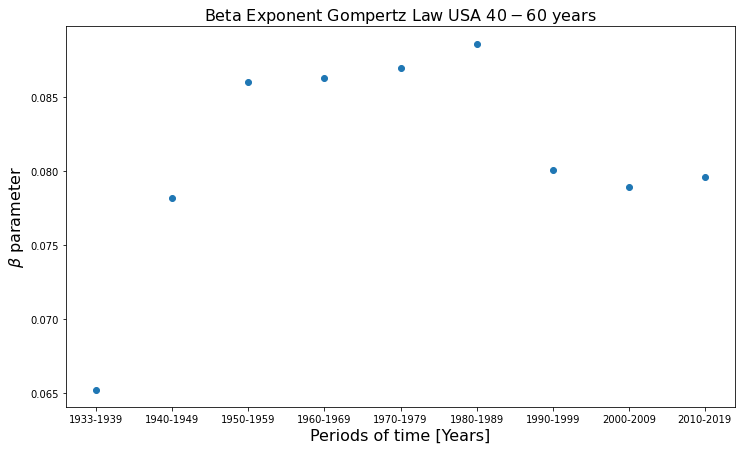

In [156]:
plt.figure(figsize=(12,7))
plt.title(r"Beta Exponent Gompertz Law USA $40-60$ years" , fontsize = 16)
plt.xlabel(r"Periods of time [Years]", fontsize = 16)
plt.ylabel(r"$\beta$ parameter", fontsize = 16)
plt.scatter(years_of_interes, betas_40_60)

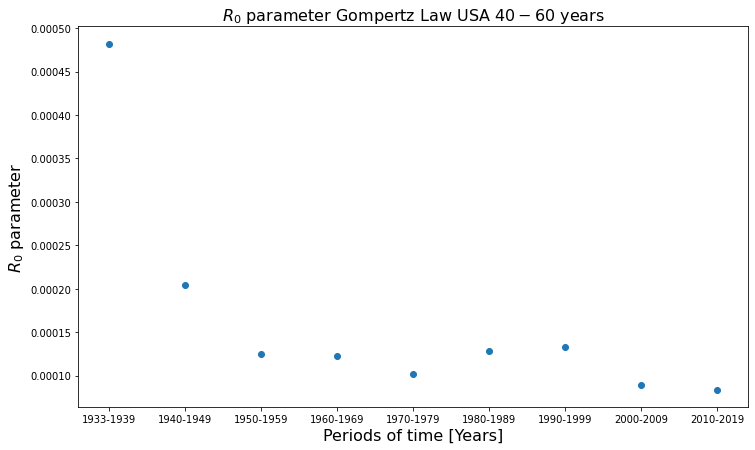

In [158]:
plt.figure(figsize=(12,7))
plt.title(r"$R_0$ parameter Gompertz Law USA $40-60$ years" , fontsize = 16)
plt.xlabel(r"Periods of time [Years]", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
plt.scatter(years_of_interes, R_40_60)

# Parameter Exploration Gompertz Law 60-80

In [160]:
from scipy.interpolate import splrep, BSpline
betas_60_80 = []
R_60_80 = []
for specific_year in years_of_interes:
    data = datos_generales[specific_year][60:80]
    edad = datos_generales["Ages"][60:80]
    tck_s = splrep(edad, data, s= len(edad))
    derivative_process = dxdt(data, edad, kind="finite_difference", k=3)
    beta_values = derivative_process/data
    R_values = data/np.e**(beta_values*edad)

    betas_60_80.append(np.mean(beta_values))
    R_60_80.append(np.mean(R_values))

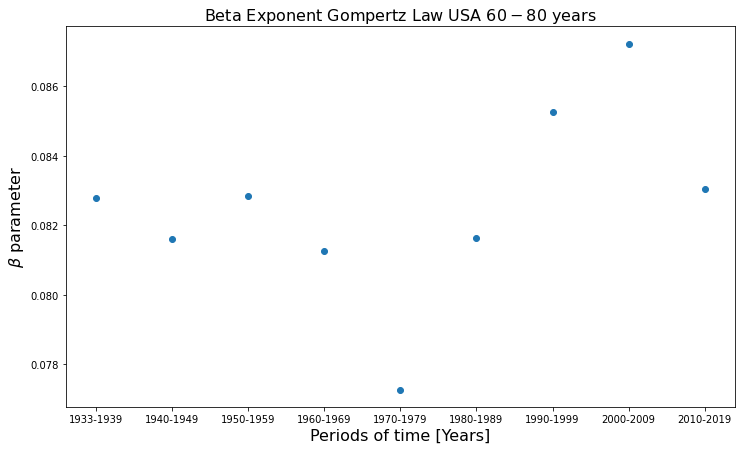

In [162]:
plt.figure(figsize=(12,7))
plt.title(r"Beta Exponent Gompertz Law USA $60-80$ years" , fontsize = 16)
plt.xlabel(r"Periods of time [Years]", fontsize = 16)
plt.ylabel(r"$\beta$ parameter", fontsize = 16)
plt.scatter(years_of_interes, betas_60_80)

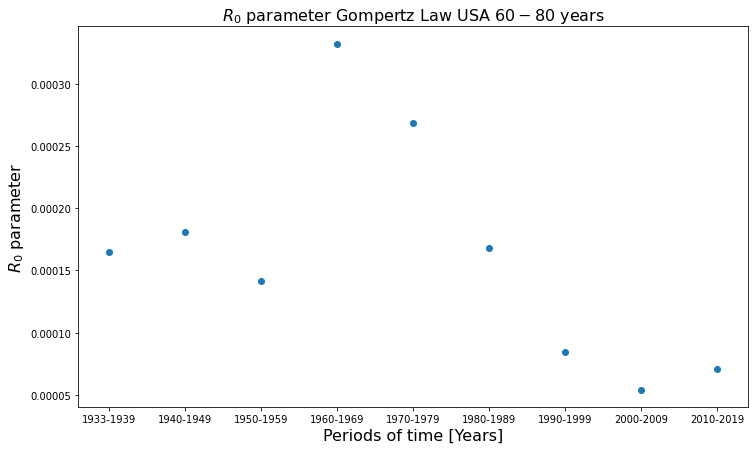

In [163]:
plt.figure(figsize=(12,7))
plt.title(r"$R_0$ parameter Gompertz Law USA $60-80$ years" , fontsize = 16)
plt.xlabel(r"Periods of time [Years]", fontsize = 16)
plt.ylabel(r"$R_0$ parameter", fontsize = 16)
plt.scatter(years_of_interes, R_60_80)

# Comparacion Betas

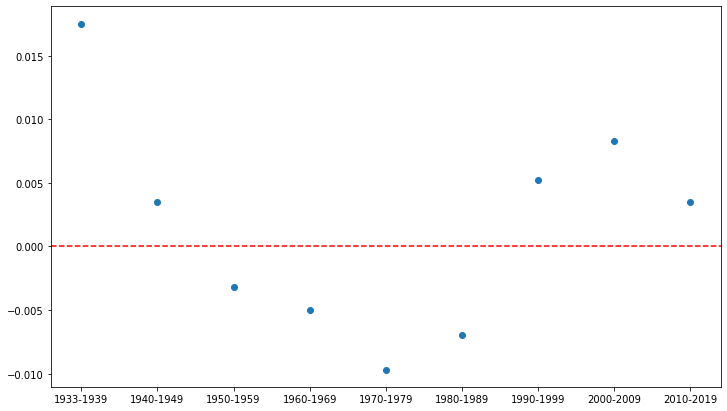

In [174]:
comparacion = (np.array(betas_60_80)-np.array(betas_40_60))
plt.figure(figsize=(12,7))
plt.scatter(years_of_interes,  comparacion)
plt.axhline(y = 0, linestyle = "--", color = "red")

# Fit 40-60 1933-1939

In [50]:
datos_40_60_USA = datos_generales["1933-1939"][40:60]
edad = datos_generales["Ages"][40:60]

from scipy.interpolate import splrep, BSpline
tck_s = splrep(edad, datos_40_60_USA, s= len(edad))
x = edad
y = datos_40_60_USA

data = datos_40_60_USA
temporal_evolution = edad
derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
beta_values = derivative_process/data
R_values = data/np.e**(beta_values*temporal_evolution)

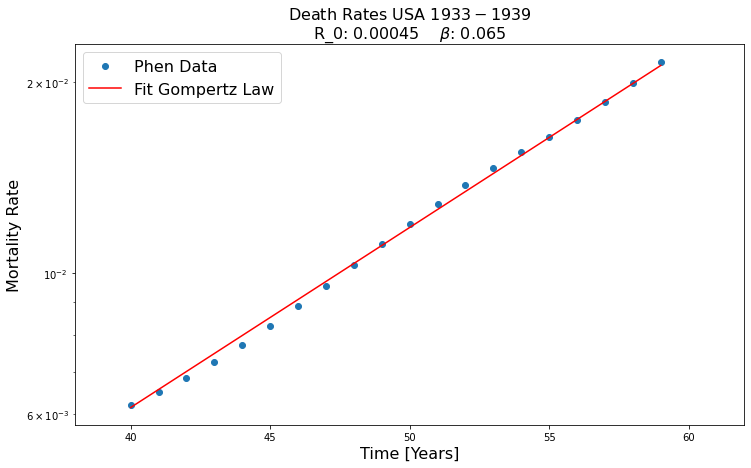

In [53]:
R_0 = 0.00045220682724107956
beta_exponencial = 0.06524058844150435

datos_expresion = R_0*(np.e**(beta_exponencial*edad))
plt.figure(figsize = (12,7))
plt.scatter(edad, datos_40_60_USA, label = "Phen Data")
plt.plot(edad, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(38,62)
plt.title(r"Death Rates USA $1933-1939$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.legend(fontsize = 16)
plt.yscale("log")
plt.savefig("Fit_Gompertz_law_USA_1933_40_60.jpg", dpi = 1000)

# Fit 60-80 1933-1939

In [54]:
datos_60_80_USA = datos_generales["1933-1939"][60:80]
edad_60_80 = datos_generales["Ages"][60:80]

tck = splrep(edad_60_80, datos_60_80_USA, s=0)
tck_s = splrep(edad_60_80, datos_60_80_USA, s= len(edad_60_80))

derivative_process = dxdt(datos_60_80_USA, edad_60_80, kind="finite_difference", k=3)
beta_values = derivative_process/datos_60_80_USA
R_values = datos_60_80_USA/np.e**(beta_values*edad_60_80)

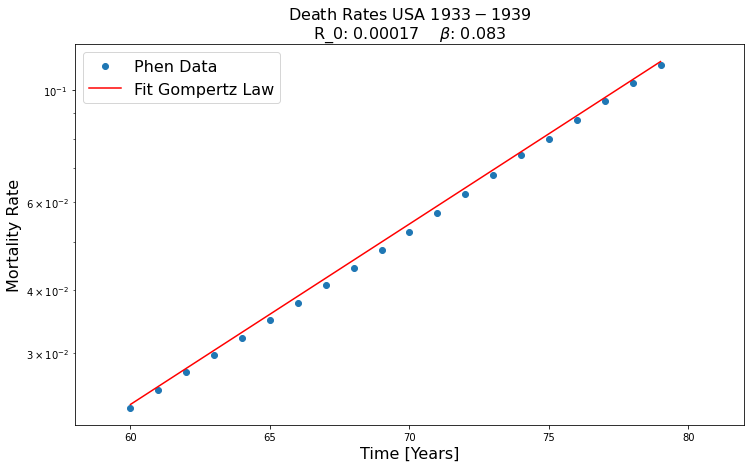

In [55]:
R_0 = np.mean(R_values)
beta_exponencial = np.mean(beta_values)

datos_expresion = R_0*(np.e**(beta_exponencial*edad_60_80))

plt.figure(figsize = (12,7))
plt.scatter(edad_60_80, datos_60_80_USA, label = "Phen Data")
plt.plot(edad_60_80, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(58,82)
plt.title(r"Death Rates USA $1933-1939$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Fit_Gompertz_law_USA_1933_60_80.jpg", dpi = 1000)


# Fit 40-80 1933-1939

In [61]:
datos_40_80_USA = datos_generales["1933-1939"][40:80]
edad_40_80 = datos_generales["Ages"][40:80]

tck = splrep(edad_40_80, datos_40_80_USA, s=0)
tck_s = splrep(edad_40_80, datos_40_80_USA, s= len(edad_40_80))

derivative_process = dxdt(datos_40_80_USA, edad_40_80, kind="finite_difference", k=3)
beta_values = derivative_process/datos_40_80_USA
R_values = datos_40_80_USA/np.e**(beta_values*edad_40_80)
print(np.mean(R_values))
print(np.mean(beta_values))

0.0003224587252085292
0.07407109199540962


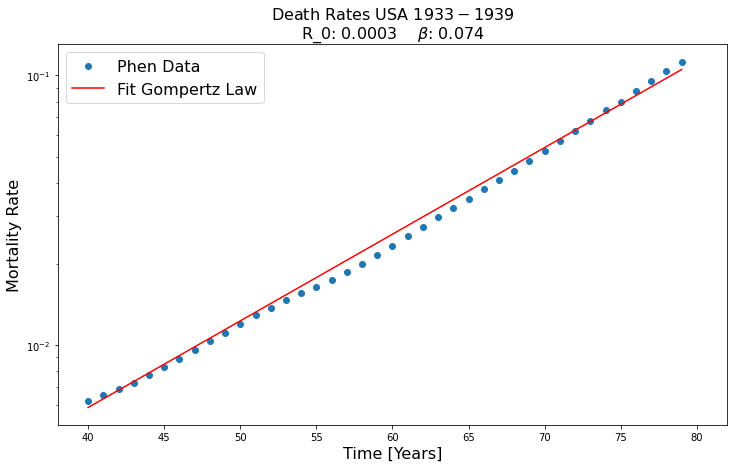

In [67]:
R_0 = 0.0003024587252085292
beta_exponencial = 0.07407109199540962

datos_expresion_40_80 = R_0*(np.e**(beta_exponencial*edad_40_80))

plt.figure(figsize = (12,7))
plt.scatter(edad_40_80, datos_40_80_USA, label = "Phen Data")
plt.plot(edad_40_80, datos_expresion_40_80, color = "red", label = "Fit Gompertz Law")
plt.xlim(38,82)
plt.title(r"Death Rates USA $1933-1939$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Fit_Gompertz_law_USA_1933_40_80.jpg", dpi = 1000)


In [ ]:
["1933-1939", "1970-1979", "2010-2019"]

# Fit 40-60 1970-1979

In [81]:
datos_40_60_USA = datos_generales["1970-1979"][40:60]
edad_40_60 = datos_generales["Ages"][40:60]

from scipy.interpolate import splrep, BSpline
tck_s = splrep(edad_40_60, datos_40_60_USA, s= len(edad_40_60))

derivative_process = dxdt(datos_40_60_USA, edad_40_60, kind="finite_difference", k=3)
beta_values = derivative_process/datos_40_60_USA
R_values = datos_40_60_USA/np.e**(beta_values*edad_40_60)
print(np.mean(beta_values))
print(np.mean(R_values))

0.08695856594127079
0.00010198654786102614


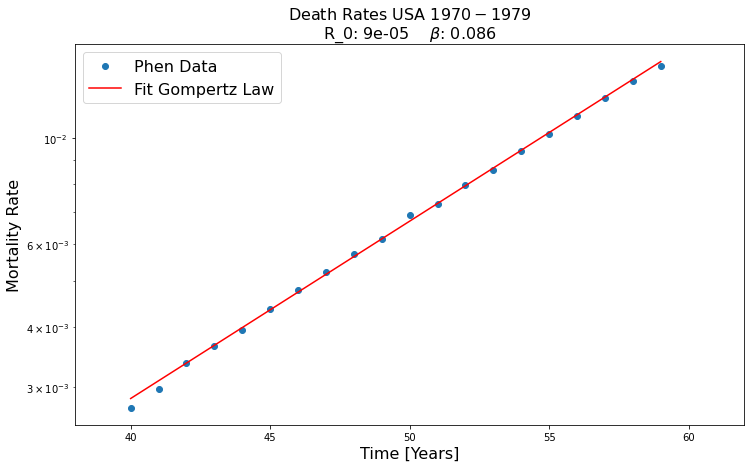

In [89]:
R_0 = 0.00009098654786102614
beta_exponencial = 0.08595856594127079

datos_expresion = R_0*(np.e**(beta_exponencial*edad_40_60))

plt.figure(figsize = (12,7))
plt.scatter(edad_40_60, datos_40_60_USA, label = "Phen Data")
plt.plot(edad_40_60, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(38,62)
plt.title(r"Death Rates USA $1970-1979$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Fit_Gompertz_law_USA_1970_40_60.jpg", dpi = 1000)


# Fit 60-80 1970-1979

In [90]:
datos_60_80_USA = datos_generales["1970-1979"][60:80]
edad_60_80 = datos_generales["Ages"][60:80]

from scipy.interpolate import splrep, BSpline
tck_s = splrep(edad_60_80, datos_60_80_USA, s= len(edad_60_80))

derivative_process = dxdt(datos_60_80_USA, edad_60_80, kind="finite_difference", k=3)
beta_values = derivative_process/datos_60_80_USA
R_values = datos_60_80_USA/np.e**(beta_values*edad_60_80)
print(np.mean(beta_values))
print(np.mean(R_values))

0.07728077771489776
0.0002685184013105176


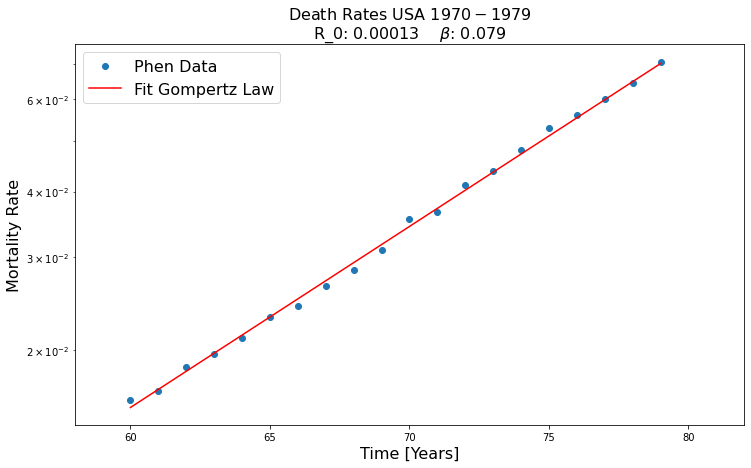

In [113]:
R_0 = 0.0001335184013105176
beta_exponencial = 0.07928077771489776


datos_expresion = R_0*(np.e**(beta_exponencial*edad_60_80))

plt.figure(figsize = (12,7))
plt.scatter(edad_60_80, datos_60_80_USA, label = "Phen Data")
plt.plot(edad_60_80, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(58,82)
plt.title(r"Death Rates USA $1970-1979$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Fit_Gompertz_law_USA_1970_60_80.jpg", dpi = 1000)


# Fit 40-80 1970-1979

In [114]:
datos_40_80_USA = datos_generales["1970-1979"][40:80]
edad_40_80 = datos_generales["Ages"][40:80]

tck = splrep(edad_40_80, datos_40_80_USA, s=0)
tck_s = splrep(edad_40_80, datos_40_80_USA, s= len(edad_40_80))

derivative_process = dxdt(datos_40_80_USA, edad_40_80, kind="finite_difference", k=3)
beta_values = derivative_process/datos_40_80_USA
R_values = datos_40_80_USA/np.e**(beta_values*edad_40_80)
print(np.mean(R_values))
print(np.mean(beta_values))

0.00015399966294422788
0.08378737271123367


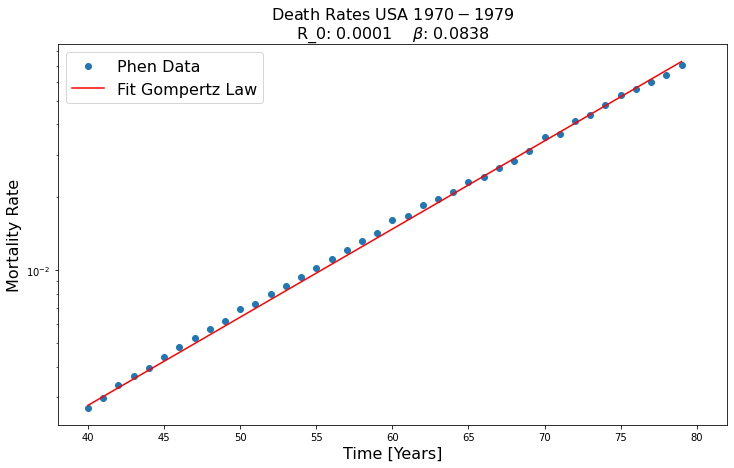

In [126]:
R_0 = 0.00009699966294422788
beta_exponencial = 0.08378737271123367

datos_expresion_40_80 = R_0*(np.e**(beta_exponencial*edad_40_80))

plt.figure(figsize = (12,7))
plt.scatter(edad_40_80, datos_40_80_USA, label = "Phen Data")
plt.plot(edad_40_80, datos_expresion_40_80, color = "red", label = "Fit Gompertz Law")
plt.xlim(38,82)
plt.title(r"Death Rates USA $1970-1979$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 4)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
plt.savefig("Fit_Gompertz_law_USA_1970_40_80.jpg", dpi = 1000)


# Fit 40-60 2010-2019

In [177]:
datos_40_60_USA = datos_generales["2010-2019"][40:60]
edad = datos_generales["Ages"][40:60]

from scipy.interpolate import splrep, BSpline
tck = splrep(edad, datos_40_60_USA, s=0)
tck_s = splrep(edad, datos_40_60_USA, s= len(edad))
x = edad
y = datos_40_60_USA

data = datos_40_60_USA
temporal_evolution = edad
derivative_process = dxdt(data, temporal_evolution, kind="finite_difference", k=3)
beta_values = derivative_process/data
R_values = data/np.e**(beta_values*temporal_evolution)
print(np.mean(beta_values))
print(np.mean(R_values))

0.07958279991539896
8.396781965060637e-05


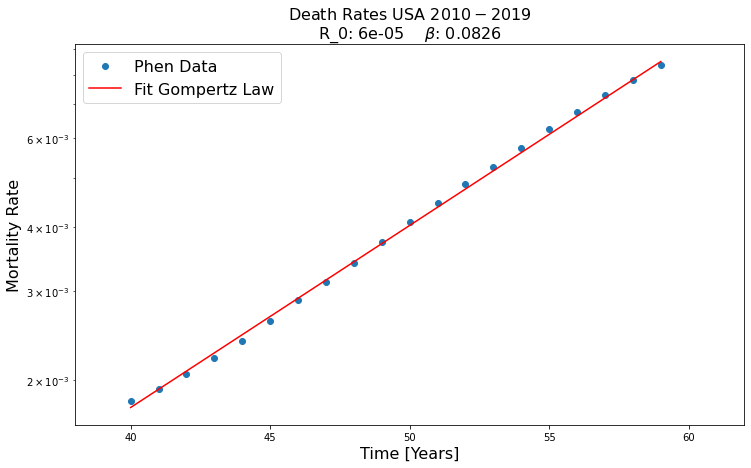

In [179]:
R_0 = 6.496781965060637e-05
beta_exponencial = 0.08258279991539896

datos_expresion = R_0*(np.e**(beta_exponencial*edad))
plt.figure(figsize = (12,7))
plt.scatter(edad, datos_40_60_USA, label = "Phen Data")
plt.plot(edad, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(38,62)
plt.title(r"Death Rates USA $2010-2019$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 4)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.legend(fontsize = 16)
plt.yscale("log")
plt.savefig("Fit_Gompertz_law_USA_2010_40_60.jpg", dpi = 1000)

# Fit 60-80 2010-2019

In [180]:
datos_60_80_USA = datos_generales["2010-2019"][60:80]
edad_60_80 = datos_generales["Ages"][60:80]

from scipy.interpolate import splrep, BSpline
tck_s = splrep(edad_60_80, datos_60_80_USA, s= len(edad_60_80))

derivative_process = dxdt(datos_60_80_USA, edad_60_80, kind="finite_difference", k=3)
beta_values = derivative_process/datos_60_80_USA
R_values = datos_60_80_USA/np.e**(beta_values*edad_60_80)
print(np.mean(beta_values))
print(np.mean(R_values))

0.0830509955882601
7.104946133167691e-05


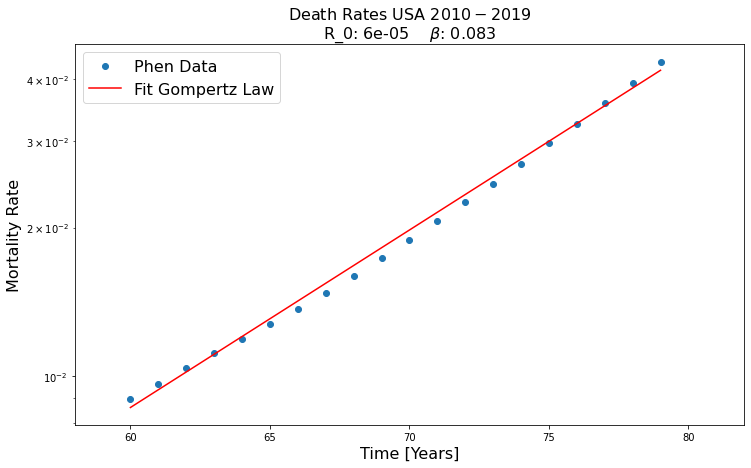

In [189]:
beta_exponencial = 0.0830509955882601
R_0 = 5.904946133167691e-05

datos_expresion = R_0*(np.e**(beta_exponencial*edad_60_80))

plt.figure(figsize = (12,7))
plt.scatter(edad_60_80, datos_60_80_USA, label = "Phen Data")
plt.plot(edad_60_80, datos_expresion, color = "red", label = "Fit Gompertz Law")
plt.xlim(58,82)
plt.title(r"Death Rates USA $2010-2019$" + "\n" + rf"R_0: {round(R_0,5)}    $\beta$: {round(beta_exponencial, 3)}" , fontsize = 16)
plt.xlabel(r"Time [Years]", fontsize = 16)
plt.ylabel(r"Mortality Rate", fontsize = 16)
plt.yscale("log")
plt.legend(fontsize = 16)
#plt.savefig("Fit_Gompertz_law_USA_1970_60_80.jpg", dpi = 1000)
